In [1]:
import torch 
import torch.nn as nn 
import numpy as np 
import pandas as pd 
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import copy 
import matplotlib.pyplot as plt 
import tqdm
import ast 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
run_mode='scene'
Block_number=11

In [3]:
class SceneClassifier(nn.Module):
    def __init__(self):
        super(SceneClassifier, self).__init__()
        self.fc2 = nn.Linear(768, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.fc2(x))
        return x


model = SceneClassifier()
total_params = sum(p.numel() for p in model.parameters())
print(total_params)
model.eval()

199434


SceneClassifier(
  (fc2): Linear(in_features=768, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [4]:
model=torch.load(f'/Users/vayungoel/Desktop/opl/scene_maam_audioset/small_model_scene_{Block_number}_opl.pth',map_location=torch.device('cpu'))
model

SceneClassifier(
  (fc2): Linear(in_features=768, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [5]:
model.eval()

SceneClassifier(
  (fc2): Linear(in_features=768, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [6]:
model.fc2.weight

Parameter containing:
tensor([[-0.0353, -0.0053, -0.0113,  ...,  0.0130, -0.0158, -0.0197],
        [ 0.0621,  0.0037, -0.0170,  ...,  0.0459,  0.0271, -0.0859],
        [-0.0620,  0.0425,  0.0554,  ..., -0.1631, -0.0051,  0.0418],
        ...,
        [-0.0339, -0.0108, -0.1211,  ...,  0.1431,  0.0147, -0.0134],
        [ 0.0564,  0.0168, -0.0327,  ...,  0.0965, -0.0243,  0.0438],
        [-0.0323, -0.0179, -0.0221,  ...,  0.0285,  0.0319, -0.0616]],
       requires_grad=True)

In [7]:
data=pd.read_csv("/Users/vayungoel/Desktop/passt/final_hear21_embeddings_train_all_blocks.csv")

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
def train_ready(data,col_name):
    new_list=[]
    for i in range(len(data)):
        temp_list=[]
        x=data[col_name][i]
        tensor_string = x

# Extract the numbers part of the string
        numbers_string = tensor_string.split("[[")[1].split("]]")[0]

# Parse the string into a Python list
        tensor_list = ast.literal_eval("[" + numbers_string + "]")

# Convert the list to a numpy array
        numpy_array = np.array(tensor_list)
        list_data=list(numpy_array)
        
        new_list.append(list_data)
    return new_list

In [10]:
y=data[run_mode].tolist()
print(y)
label_array_train = np.array(y).reshape(-1, 1)
encoder=OneHotEncoder()
y_one_hot_encoded = encoder.fit_transform(label_array_train).toarray()
# print(len(y_one_hot_encoded))
y_one_hot_encoded

['airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport'

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [11]:
col_name=f'embedding{Block_number}'
X_data=train_ready(data,col_name)
X_data=np.array(X_data)
X_data = model(torch.from_numpy(X_data).to(torch.float32))

In [12]:
X_data = X_data.detach().numpy()

In [14]:
X_data.shape

(13962, 256)

In [15]:
result = np.matmul(X_data, X_data.T)

In [19]:
result.shape

(13962, 13962)

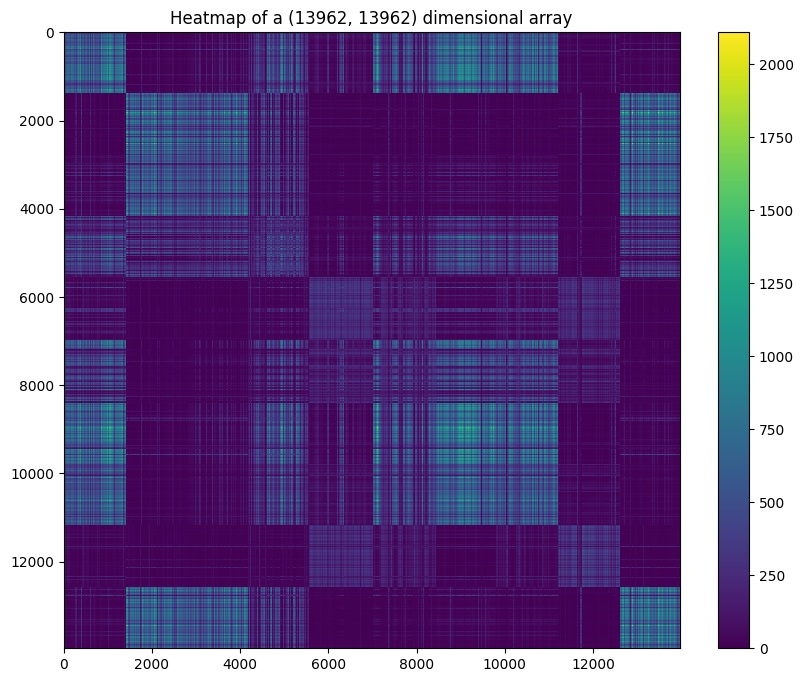

In [21]:
import matplotlib.pyplot as plt


# Create a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(result, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of a (13962, 13962) dimensional array')
plt.show()